In [34]:
import ast, json, geopandas as gpd, pandas as pd
from shapely.geometry import shape
from shapely.ops import unary_union
from bs4 import BeautifulSoup

In [2]:
# Leggi il contenuto del file JSON in formato ASCII
with open('D-flight data/newoutWKT.txt', 'r') as file:
    content = file.read()
    data = ast.literal_eval(content)

In [3]:
crs_string = data['payload']['crs']['properties']['name']
split_values = crs_string.split("::")
crs = split_values[-1]

In [4]:
# Crea una lista vuota per memorizzare i GeoDataFrames
gdfs = []

# Itera attraverso gli elementi della lista data['payload']['features'] e crea un GeoDataFrame per ciascun elemento
for feature in data['payload']['features']:
    
    properties = feature['properties']
        
    geometry = shape(feature['geometry'])
    
    # Crea un dizionario per le colonne del GeoDataFrame
    columns_dict = {'geometry': [geometry]}
    
    # Itera attraverso le chiavi di properties
    for key in properties.keys():
        # Aggiungi la colonna al dizionario con il valore corrispondente o None se mancante
        columns_dict[key] = [properties.get(key, None)]
    
    # Crea il GeoDataFrame utilizzando il dizionario di colonne
    gdf = gpd.GeoDataFrame(columns_dict)
    
    gdfs.append(gdf)


In [5]:
# Usa la funzione concat per concatenare i GeoDataFrames nella lista
concatenated_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

In [6]:
concatenated_gdf = concatenated_gdf.set_crs(crs)

In [7]:
# Definisci una funzione per estrarre il testo da una cella HTML
def extract_text_from_html(html_text):
    soup = BeautifulSoup(html_text, 'html.parser')
    return soup.get_text()

# Applica la funzione a ogni cella della colonna 'rule' e crea una nuova colonna 'rule_text'
concatenated_gdf['rule'] = concatenated_gdf['rule'].apply(extract_text_from_html)
concatenated_gdf['regola'] = concatenated_gdf['regola'].apply(extract_text_from_html)

C:\Users\niett\AppData\Local\Temp\ipykernel_20676\2769365688.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(html_text, 'html.parser')


In [8]:
# Specifica il percorso del file shapefile di destinazione (senza estensione .shp)
output_shapefile_path = "D-flight data/D_flight.shp"

# Esporta il GeoDataFrame come shapefile
concatenated_gdf.to_file(output_shapefile_path)

C:\Users\niett\AppData\Local\Temp\ipykernel_20676\157396565.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  concatenated_gdf.to_file(output_shapefile_path)


In [9]:
concatenated_gdf

,geometry,id,name,quota_max,type,rule,regola,subtype,lower_limit_m,upper_limit_m,valid_from,valid_to,priority,designator,icona_titolo,title_rule,titolo_regola,note,description,owner
0,"MULTIPOLYGON (((69496.263 4991834.127, 71580.0...",473702,AERO CLUB PIACENZA,25,ATM09,The geographical area is defined starting from...,La zona geografica è definita a partire da alt...,Aviosuperficie autorizzata ENAC,0,25,2023-08-31T14:07:32.120Z,None,25,avio_6243,None,Open max height,Open altezza max,None,NaN,NaN
1,"MULTIPOLYGON (((71494.419 4994528.078, 72536.3...",471561,AERO CLUB PIACENZA,0,ATM09,The geographical area is defined from the grou...,La zona geografica è definita a partire dal su...,Aviosuperficie autorizzata ENAC,0,0,2023-08-31T14:07:32.120Z,None,1,avio_6243,None,Open max height,Open altezza max,None,NaN,NaN
2,"MULTIPOLYGON (((69171.086 4988974.549, 73534.7...",472913,AERO CLUB PIACENZA,45,ATM09,The geographical area is defined starting from...,La zona geografica è definita a partire da alt...,Aviosuperficie autorizzata ENAC,0,45,2023-08-31T14:07:32.120Z,None,45,avio_6243,None,Open max height,Open altezza max,None,NaN,NaN
3,"MULTIPOLYGON (((286371.204 4928752.039, 286303...",474645,AGIP - RAVENNA,45,ATM09,The geographical area is defined starting from...,La zona geografica è definita a partire da alt...,Elisuperficie autorizzata ENAC,0,45,2023-08-31T14:07:32.120Z,None,45,avio_5,None,Open max height,Open altezza max,None,NaN,NaN
4,"MULTIPOLYGON (((285371.204 4928752.039, 285323...",473405,AGIP - RAVENNA,25,ATM09,The geographical area is defined starting from...,La zona geografica è definita a partire da alt...,Elisuperficie autorizzata ENAC,0,25,2023-08-31T14:07:32.120Z,None,25,avio_5,None,Open max height,Open altezza max,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,"POLYGON ((88030.389 4894542.766, 89758.788 489...",3528,W2891/23,0,NO_FLY_ZONE,"""TEMPORARY RESERVED AREAS AS FOR NOTAM W2891 A...","""AREA TEMPORANEAMENTE RISERVATE COME DA NOTAM ...",NO_FLY_ZONE,0,122,2023-09-10T22:01:00Z,2023-10-13T21:59:00Z,-1,NaN,NaN,NaN,NaN,Descrizione: \n\nInserita da: cpezzella\n,,cpezzella
421,"POLYGON ((87144.129 4891809.829, 87739.077 489...",3541,NOTAM W2876/23 - AREA 1,0,NO_FLY_ZONE,"Schedule (UTC): SEP 11-14 18-22 25-29 SR-SS, ...","Schedule (UTC): SEP 11-14 18-22 25-29 SR-SS, ...",NO_FLY_ZONE,0,122,2023-09-11T00:00:00Z,2023-10-06T23:59:00Z,-1,NaN,NaN,NaN,NaN,Descrizione: CIV UNMANNED ACFT ACTIVITY WILL T...,CIV UNMANNED ACFT ACTIVITY WILL TAKE PLACE WI ...,cpezzella
422,"POLYGON ((280057.860 4851440.075, 292128.223 4...",3542,NOTAM W2884/23,0,NO_FLY_ZONE,Schedule (UTC): 19-22 25-28 0600-2200 ...,Schedule (UTC): 19-22 25-28 0600-2200 ...,NO_FLY_ZONE,0,1921,2023-09-19T06:00:00Z,2023-09-28T22:00:00Z,-1,NaN,NaN,NaN,NaN,Descrizione: MILITARY FIRING AREA (CARPEGNA-SS...,MILITARY FIRING AREA (CARPEGNA-SSW SAN MARINO)...,cpezzella
423,"POLYGON ((161900.166 4958567.382, 161778.754 4...",3543,NOTAM W2885/23,0,NO_FLY_ZONE,Schedule (UTC): DAILY 1500-0400 ...,Schedule (UTC): DAILY 1500-0400 ...,NO_FLY_ZONE,0,610,2023-09-08T15:00:00Z,2023-10-10T04:00:00Z,-1,NaN,NaN,NaN,NaN,Descrizione: OVERFLYING FORBIDDEN TO ALL VFR T...,"OVERFLYING FORBIDDEN TO ALL VFR TRAFFIC, ULTRA...",cpezzella


In [118]:
# Ordina il GeoDataFrame in base alla colonna 'quota_max' in ordine decrescente
concatenated_gdf = concatenated_gdf.sort_values(by='quota_max', ascending=False)

# Inizializza un GeoDataFrame vuoto per il risultato
gdf_60 = concatenated_gdf[concatenated_gdf['quota_max'] == 60].copy()

gdf_result = gdf_60.dissolve(by='quota_max', as_index=False)

# Itera attraverso i valori di 'quota_max' in ordine decrescente
for quota_max_value in concatenated_gdf['quota_max'].unique():
    if quota_max_value != 60:  # Escludi il valore 60
        sub_gdf = concatenated_gdf[concatenated_gdf['quota_max'] == quota_max_value].copy()
        
        gdf_dissolve = sub_gdf.dissolve(by='quota_max', as_index=False)    
        
        gdf_result = gdf_result.overlay(gdf_dissolve, how='difference')
        
        gdf_result = pd.concat([gdf_result, gdf_dissolve])
        
# Alla fine delle tue operazioni, seleziona solo le colonne 'geometry' e 'quota_max' in gdf_result
gdf_result = gdf_result[['geometry', 'quota_max']]

In [119]:
# Specifica il percorso del file shapefile di destinazione (senza estensione .shp)
output_shapefile_path = "D-flight data/D_flight_clean.shp"

# Esporta il GeoDataFrame come shapefile
gdf_result.to_file(output_shapefile_path)

<Axes: >

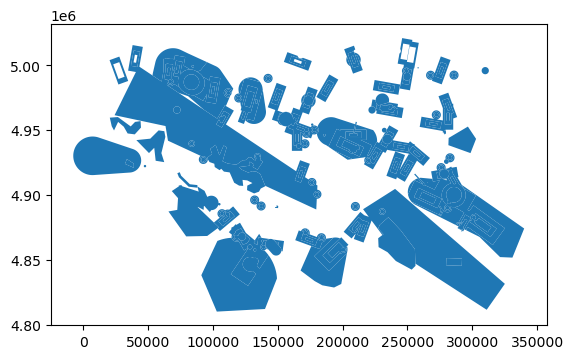

In [120]:
gdf_result.plot()

In [121]:
gdf_result

,geometry,quota_max
0,"MULTIPOLYGON (((321463.566 4852207.998, 305572...",60
1,"MULTIPOLYGON (((297956.324 4879449.659, 314136...",45
2,"MULTIPOLYGON (((290664.403 4878025.447, 292405...",25
0,"MULTIPOLYGON (((73157.716 4897647.770, 68349.4...",0
